In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display # Allows the use of display() for DataFrames
#import visuals as vs # Import supplementary visualization code visuals.py
from sklearn.preprocessing import MinMaxScaler # Import sklearn.preprocessing.StandardScaler
import seaborn as sns
from scipy import stats
from time import time
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [3]:
data_tuesday_original = pd.read_csv('data/Tuesday-WorkingHours.pcap_ISCX.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data_tuesday = data_tuesday_original.copy()

In [5]:
X = data_tuesday.drop([' Label'], axis=1)
y = data_tuesday[' Label']

In [6]:
features = [' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length']

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X[features])

# summarize transformed data
np.set_printoptions(precision=3)
display(X[0:5,:])

array([[1.343e-03, 5.367e-06, 2.906e-05, 1.449e-05, 1.812e-04, 5.710e-07,
        8.864e-03, 0.000e+00, 1.345e-02, 1.989e-02, 1.362e-02, 0.000e+00,
        2.396e-02, 2.513e-02, 5.667e-07, 1.599e-06, 3.742e-06, 1.167e-07,
        5.333e-06, 8.889e-07, 2.302e-06, 4.142e-06, 8.333e-09, 4.483e-06,
        1.494e-06, 3.677e-06, 4.417e-06, 3.333e-08, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 9.999e-01, 9.949e-01],
       [1.343e-03, 7.533e-06, 3.875e-05, 1.449e-05, 2.471e-04, 4.695e-06,
        1.209e-02, 0.000e+00, 1.427e-02, 2.451e-02, 1.120e-01, 0.000e+00,
        1.970e-01, 2.066e-01, 6.583e-07, 2.274e-06, 5.733e-06, 1.167e-07,
        7.500e-06, 9.375e-07, 2.991e-06, 6.117e-06, 8.333e-09, 6.383e-06,
        2.128e-06, 5.270e-06, 6.317e-06, 2.500e-08, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 9.999e-01, 9.949e-01],
       [1.343e-03, 1.008e-05, 2.906e-05, 1.449e-05, 1.143e-03, 4.514e-06,
        5.592e-02, 0.000e+00, 8.488e-02, 1.255e-01, 1.077e-01, 0.000e+00,
      

In [7]:
y = pd.get_dummies(y)
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y)
np.set_printoptions(precision=3)
display(y[0:1000,:])


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

rfc.fit(X,y);

# extract important features
score = np.round(rfc.feature_importances_,3)

#importances = pd.DataFrame({'feature':refclasscol,'importance':score})
#importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
#plt.rcParams['figure.figsize'] = (11, 4)
#importances.plot.bar();

In [9]:
for x, y  in zip(features, range(0, len(features))):
    print(x, score[y])
    
importance = pd.DataFrame({'feature':x,'importance':score[y]} for x, y in zip(features, range(0, len(features))))

 Destination Port 0.348
 Flow Duration 0.01
 Total Fwd Packets 0.018
 Total Backward Packets 0.018
Total Length of Fwd Packets 0.058
 Total Length of Bwd Packets 0.0
 Fwd Packet Length Max 0.087
 Fwd Packet Length Min 0.0
 Fwd Packet Length Mean 0.065
 Fwd Packet Length Std 0.053
Bwd Packet Length Max 0.04
 Bwd Packet Length Min 0.0
 Bwd Packet Length Mean 0.043
 Bwd Packet Length Std 0.008
 Flow IAT Mean 0.022
 Flow IAT Std 0.001
 Flow IAT Max 0.003
 Flow IAT Min 0.001
Fwd IAT Total 0.005
 Fwd IAT Mean 0.007
 Fwd IAT Std 0.011
 Fwd IAT Max 0.017
 Fwd IAT Min 0.01
Bwd IAT Total 0.033
 Bwd IAT Mean 0.036
 Bwd IAT Std 0.02
 Bwd IAT Max 0.03
 Bwd IAT Min 0.003
Fwd PSH Flags 0.054
 Bwd PSH Flags 0.0
 Fwd URG Flags 0.0
 Bwd URG Flags 0.0
 Fwd Header Length 0.0
 Bwd Header Length 0.001


Text(0.5,1,'Importance of Features')

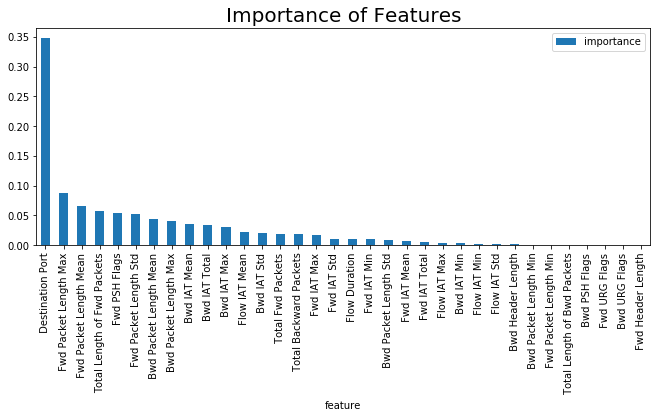

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
importance = importance.sort_values('importance', ascending=False).set_index('feature')


plt.rcParams['figure.figsize'] = (11,4)
plot = importance.plot.bar()
plot.set_title("Importance of Features", fontsize=20)


#importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
#plt.rcParams['figure.figsize'] = (11, 4)
#importances.plot.bar();

In [11]:
importance = pd.DataFrame({'feature':x,'importance':score[y]} for x, y in zip(features, range(0, len(features))))

In [12]:
importance.sort_values('importance', ascending=False)

,feature,importance
0,Destination Port,0.348
6,Fwd Packet Length Max,0.087
8,Fwd Packet Length Mean,0.065
4,Total Length of Fwd Packets,0.058
28,Fwd PSH Flags,0.054
9,Fwd Packet Length Std,0.053
12,Bwd Packet Length Mean,0.043
10,Bwd Packet Length Max,0.040
24,Bwd IAT Mean,0.036
23,Bwd IAT Total,0.033


In [13]:
attack_class_freq_train = data_tuesday[[' Label']].apply(lambda x: x.value_counts())
attack_class_dist = attack_class_freq_train
attack_class_dist

,Label
BENIGN,432074
FTP-Patator,7938
SSH-Patator,5897


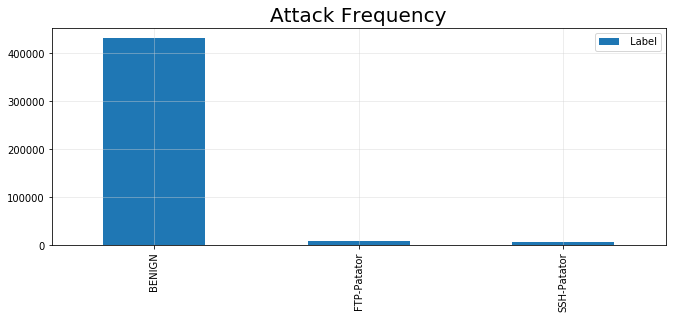

In [14]:
#plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot = attack_class_dist.plot(kind="bar");
plot.set_title("Attack Frequency", fontsize=20);
#plt.annotate('figure points',
#            xy=(80, 80), xycoords='figure points')
plot.grid(color='lightgray', alpha=0.5);